# Homework 5: Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [295]:
MY_UNIQNAME = 'elenore'

## Scenario

As a newly hired member of the United Nation's (UN) Archives and Records Management Section (ARMS), your manager has asked you to analyze forty years of statements presented by hundreds of heads of state and senior officials at the UN General Debates. Your initial report should clearly document the steps you have taken to manipulate the data as well as insights from trends and patterns you identify which your manager may want to share with her peers within the UN. 

## 0. Download the data from: 

* [https://www.kaggle.com/unitednations/un-general-debates](https://www.kaggle.com/unitednations/un-general-debates)

### <span style="color:magenta"> Q1. [10 pts] Initial clean up and EDA
1. Load the UN General Debates data.
1. Merge in the ISO 3166 country names available here: https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes.
1. Clean and simplify the country names by removing any values between parentheses () or brackets [].
1. Report the mean number of statements delivered by a country.
1. Report the five countries that have delivered the fewest statements in total.

In [296]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [297]:
# 1. Load the UN General Debates data.
un_dataset = pd.read_csv('un-general-debates.csv')

In [298]:
un_dataset.head()

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the ...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on your election to the presidency of the General Assembly at its forty-fourth session. Your wide exper..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure for me, on behalf of the delegation of Niger, to congratulate you moat warmly on your brilliant elec..."
3,44,1989,URY,"﻿\nDuring the debate at the fortieth session of the General Assembly four years ago, President Sanguinetti announced to the world community from t..."
4,44,1989,ZWE,"﻿I should like at the outset to express my delegation's satisfaction and pleasure at your election, Sir, to the presidency of the General Assembly..."


In [299]:
# 2. Merge in the ISO 3166 country names
country_url = 'https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'
country_table = pd.read_html(country_url)[0]
country_table
country_table['country']=country_table['ISO 3166-1[2]']['Alpha-3 code[9]']

In [300]:
un_data_merge = un_dataset.merge(country_table,on='country', how='left')
un_data_merge.columns[0:5]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


Index(['session', 'year', 'country', 'text',
       ('ISO 3166[1]', 'Country name[9]')],
      dtype='object')

In [301]:
un_clean = un_data_merge[["session","year","country", "text", ('ISO 3166[1]', 'Country name[9]')]]
un_clean.rename(columns = {('ISO 3166[1]', 'Country name[9]'):'country_name'}, inplace = True)
un_clean.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,session,year,country,text,country_name
0,44,1989,MDV,﻿It is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the ...,Maldives
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on your election to the presidency of the General Assembly at its forty-fourth session. Your wide exper...",Finland
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure for me, on behalf of the delegation of Niger, to congratulate you moat warmly on your brilliant elec...",Niger (the)
3,44,1989,URY,"﻿\nDuring the debate at the fortieth session of the General Assembly four years ago, President Sanguinetti announced to the world community from t...",Uruguay
4,44,1989,ZWE,"﻿I should like at the outset to express my delegation's satisfaction and pleasure at your election, Sir, to the presidency of the General Assembly...",Zimbabwe


In [358]:
# 3. Clean and simplify the country names by removing any values between parentheses () or brackets [].
un_clean["country_name"] = un_clean["country_name"].str.replace(r"(\s*\[.*?\]\s*)", " ").str.strip()
un_data = un_clean

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [303]:
# 4. Report the mean number of statements delivered by a country.
un_data.groupby('country').text.count().mean()

37.72361809045226

In [359]:
# 5. Report the five countries that have delivered the fewest statements in total.
pd.DataFrame(un_data.country_name.value_counts().sort_values().head(5))

,country_name
South Sudan,5
Montenegro,10
Timor-Leste,13
Holy See,13
Kiribati,13


The mean number of statements delivered by a country is 38.

The five countries that have delivered the fewest statements in total are South Sudan, Montenegro,Timor-Leste, Holy See and Kiribati.

### <span style="color:magenta"> Q2. [15 pts] Search with regex
1. Select the text of three different statements.
1. Pick one of the texts and find the count of how many times terms like cooperation, cooperate, cooperating, cooperated, cooperates are in the text.
1. Pick another one of the texts and find the count of how many times terms like democracy, democratic, democracies, democratically, nondemocratic, and undemocratic are in the text.
1. Use the remaining text to find the count of how many times numbers or words about numbers are in the text. For instance, 1, first, one, 1st, etc. 
   - This is challenging and we don't expect you to find every single instance. Try your best at finding as many as possible but your solution must cover some combination of numbers and words referring to numbers.

In [362]:
statement1 = un_data['text'][1]

In [363]:
word_dict={}
for element in re.findall('coopera[a-z]*', statement1):
    word_dict[element] = statement1.count(element)
word_dict

{'cooperation': 1}

In [364]:
statement2 = un_data['text'][2]

In [365]:
word_dict={}
for element in re.findall('[a-z]*democra[a-z]*', statement2):
    word_dict[element] = statement2.count(element)
word_dict
# there's one cooperation in the graph

{'democratic': 1, 'democracy': 1}

In [366]:
statement3 = un_data['text'][0]

In [367]:
word_dict={}
for element in re.findall('\d|one|two|three|four|1st|2nd|3rd|4th', statement3):
    word_dict[element] = statement3.count(element)
word_dict

{'four': 1,
 'one': 13,
 '1': 4,
 '9': 3,
 '8': 3,
 '0': 4,
 '7': 2,
 '2': 2,
 'two': 2,
 '5': 1}

I randomly chose the first, second and the third row's texts.

There is 1 cooperation in my first chosen statement, 1 democratic and 1 democracy in my second chosen statement. As for the number related words, please refer to the output above.

### <span style="color:magenta"> Q3a. [20 pts] Tokenize and plot top 10 words  
1. Select three countries that have delivered statements for the majority of the years covered by the data.
1. Tokenize their texts and plot the ten most common words used based on the count for each country (without removing stop words, punctuation, etc.). Make sure your plots are labeled and have a title. Describe the commonalities or differences you notice.

> #### You can use nltk and/or spaCy to answer this question.

In [311]:
import nltk
from collections import Counter

In [312]:
# countries I choose are: AUT, SDN, URY
AUT = un_data[un_data['country']=='AUT'].text.sum()
aut_tokens = nltk.word_tokenize(AUT)

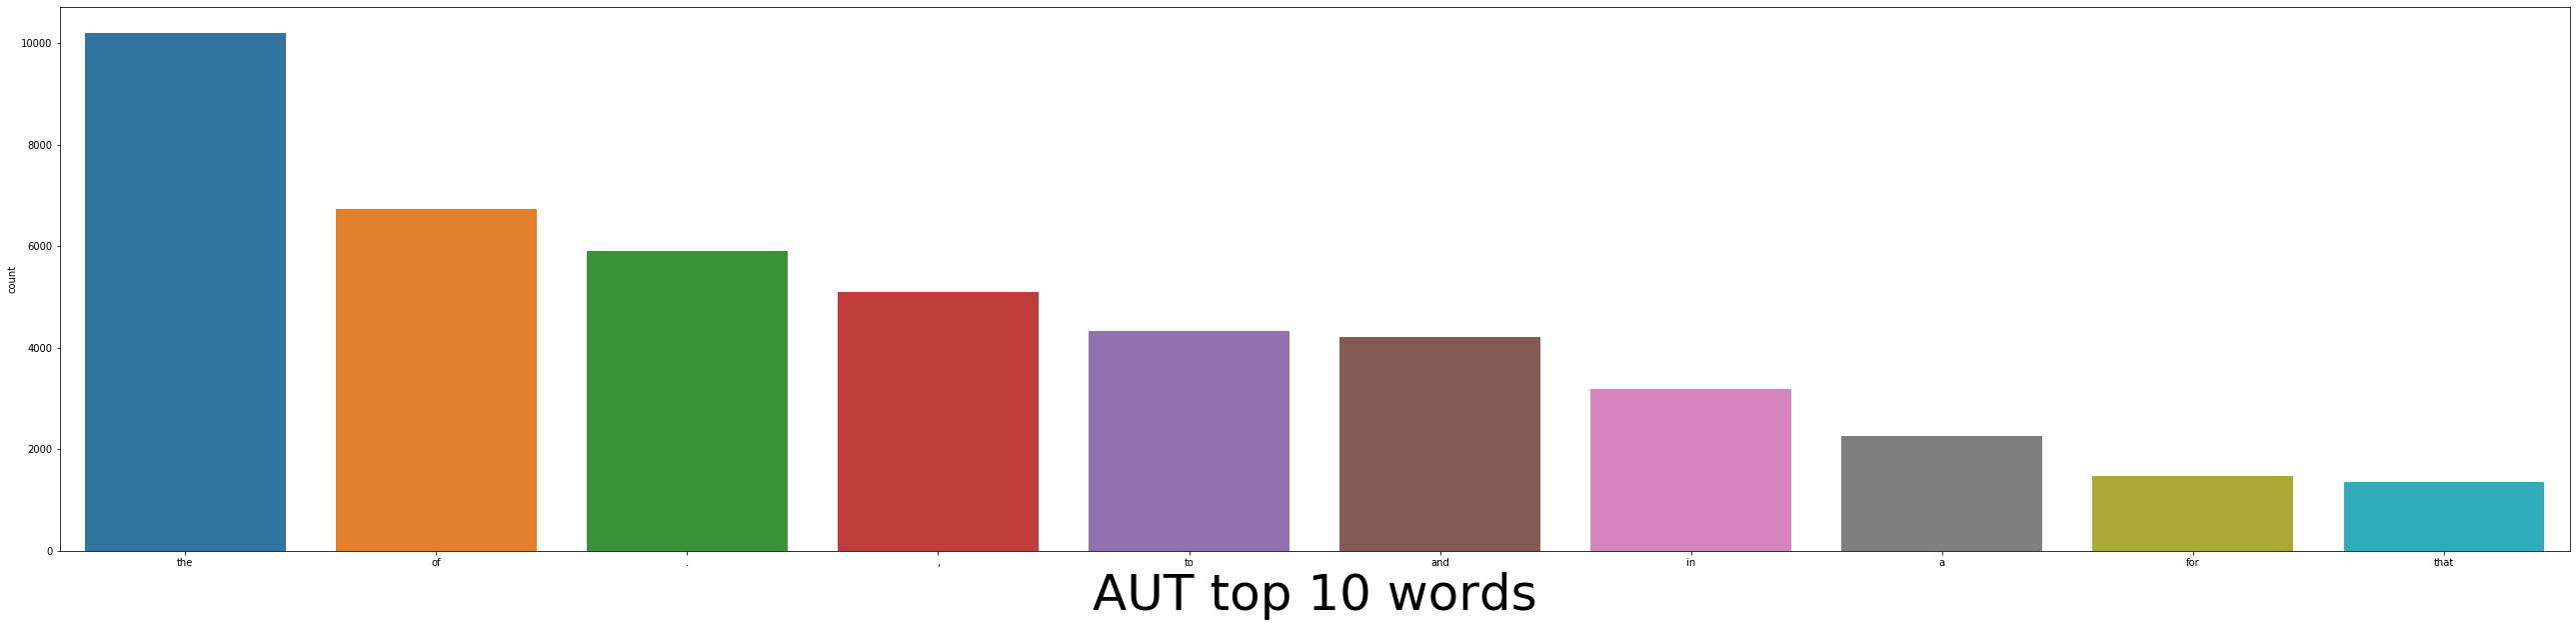

In [313]:
plt.figure(figsize=(45,10))
sns.countplot(aut_tokens, order=pd.Series(aut_tokens).value_counts().index[:10])
plt.xlabel('AUT top 10 words', fontsize=50)
plt.show()

In [314]:
SDN = un_data[un_data['country']=='SDN'].text.sum()
sdn_tokens = nltk.word_tokenize(SDN)

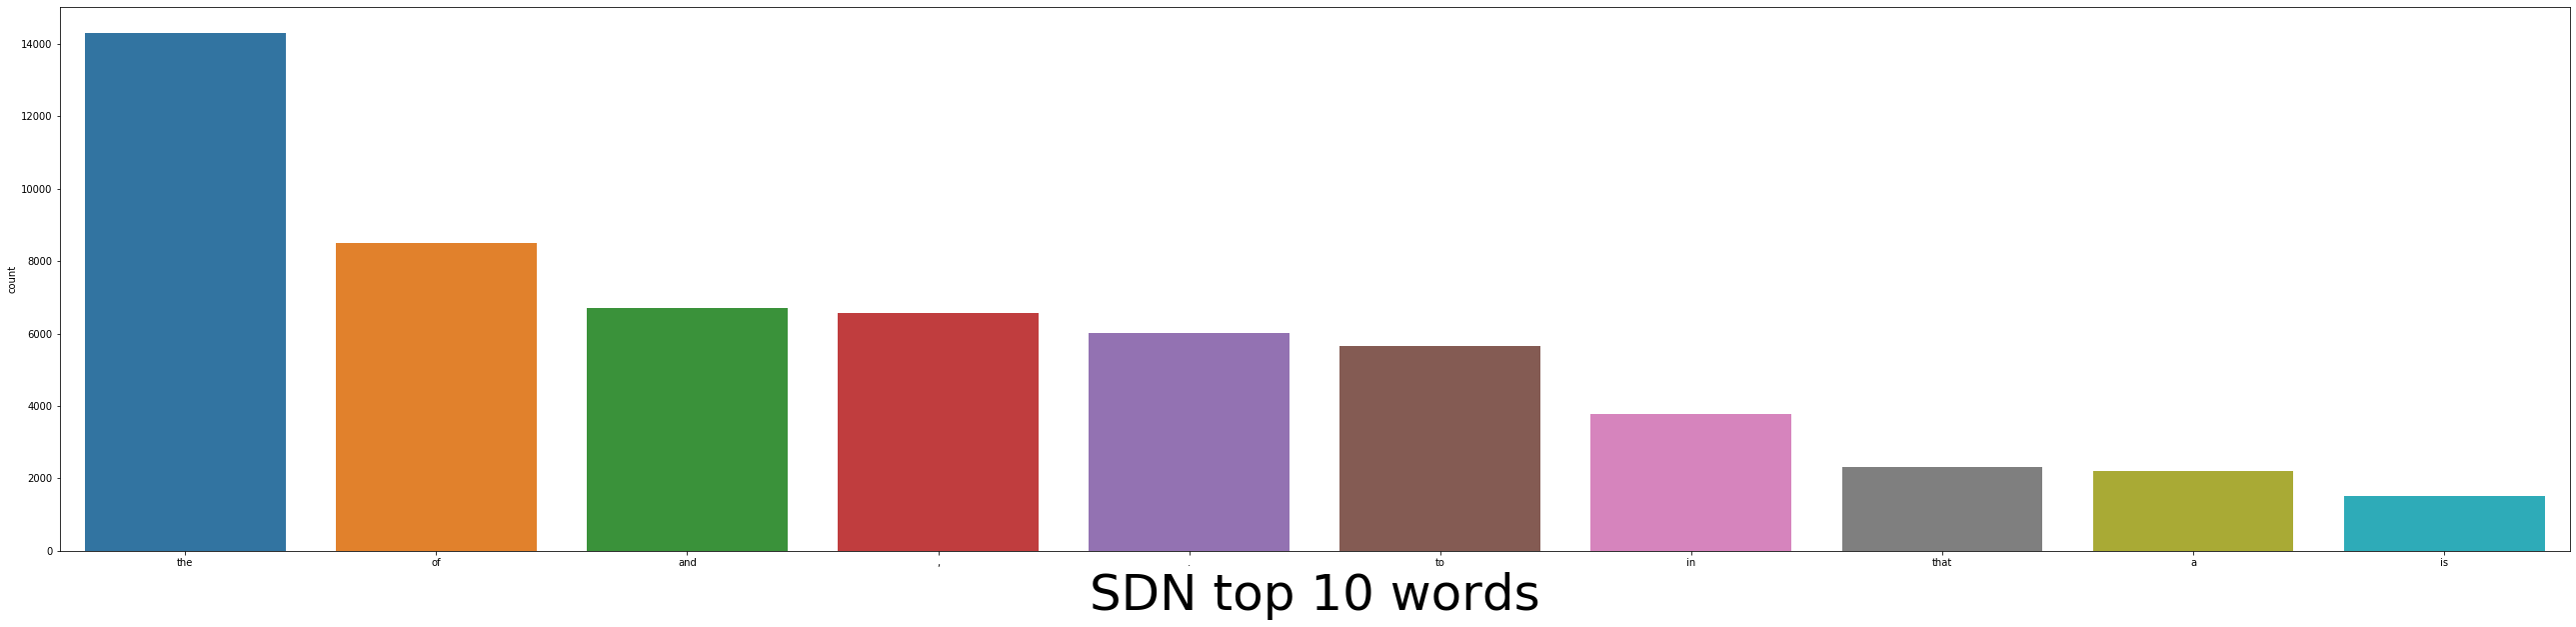

In [315]:
plt.figure(figsize=(45,10))
sns.countplot(sdn_tokens, order=pd.Series(sdn_tokens).value_counts().index[:10])
plt.xlabel('SDN top 10 words', fontsize=50)
plt.show()

In [316]:
URY = un_data[un_data['country']=='URY'].text.sum()
ury_tokens = nltk.word_tokenize(URY)

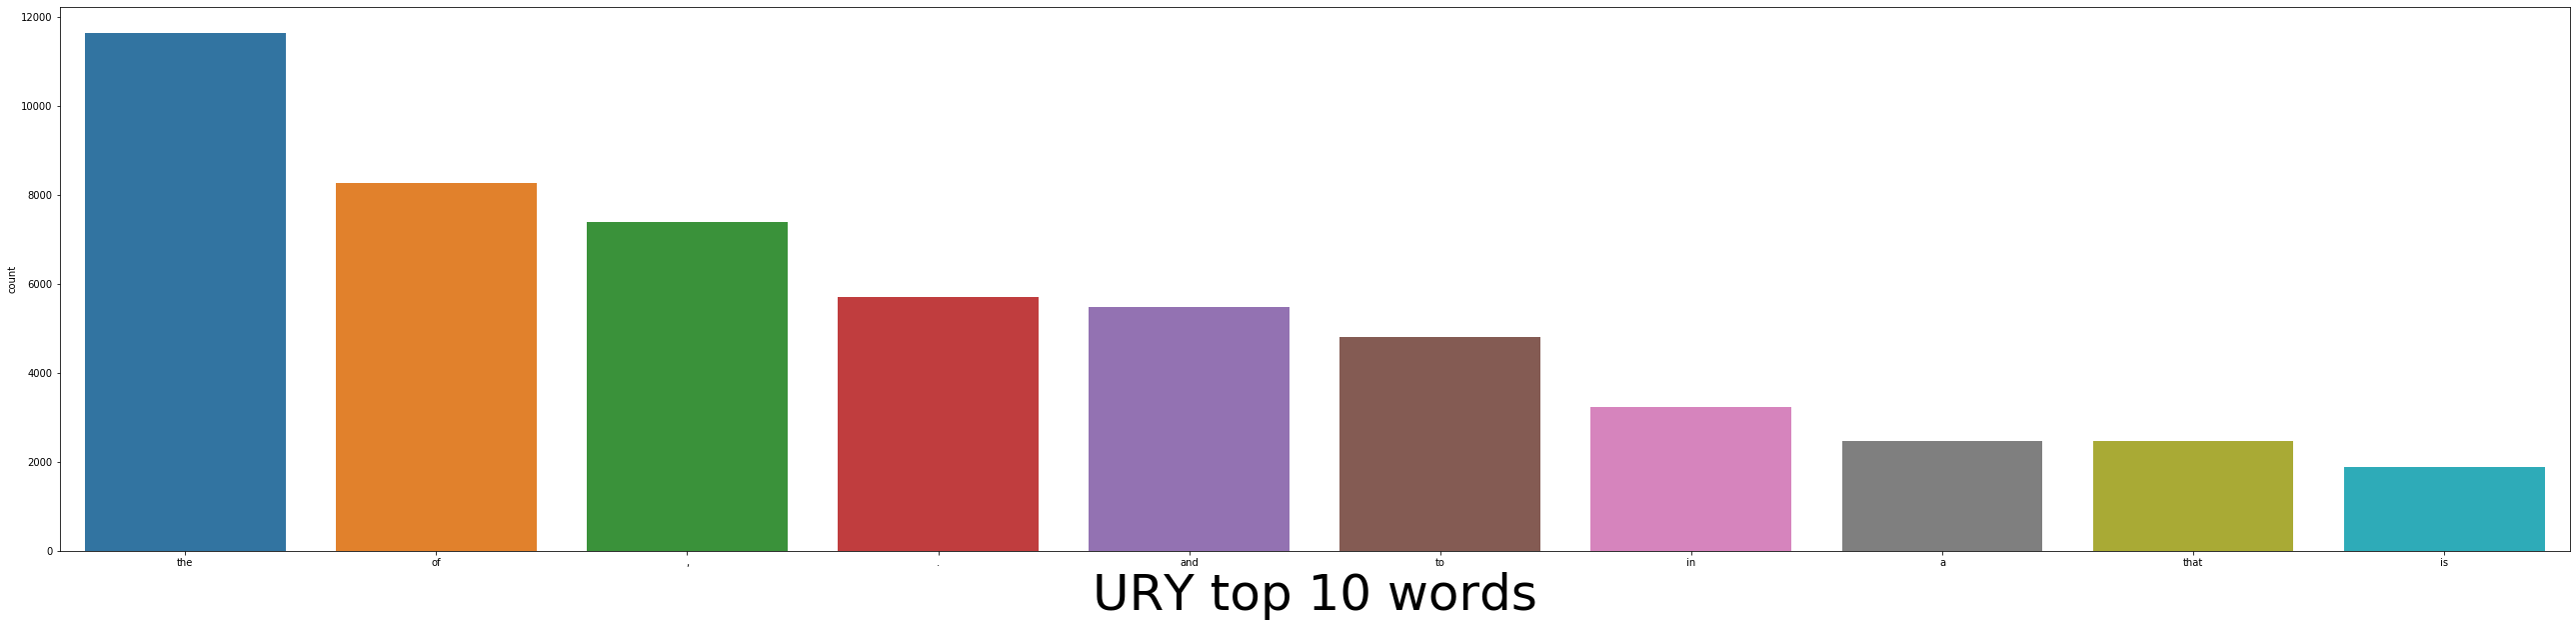

In [317]:
plt.figure(figsize=(45,10))
sns.countplot(ury_tokens, order=pd.Series(ury_tokens).value_counts().index[:10])
plt.xlabel('URY top 10 words', fontsize=50)
plt.show()

3 countries I chose are: Austria, Sudan and Uruguay.

From the top 10 common words plots, the biggest commonality is they all have lots of meaningless English words like 'the', 'of' or marks like '.', '-' etc. That's why we need to remove stopwords later. These plots can not provide much useful information, except proving how often people use 'the' in their speeches. There's not much noticble differences among the 3 chosen countries.

### <span style="color:magenta"> Q3b. [15 pts] Tokenize and plot top 10 words
Continue working with the same countries and their texts as selected above.
1. Remove stop words, punctuations, and any other characters you deem necessary from the tokenized text.
1. Remove a few additional words that are less informative given the context and because they are common across statements (e.g. 3 or 4 of the common words seen in the plots from 3a).
1. Plot the ten most common words used by each country. Make sure your plots are labeled and have a title. Describe any commonalities or differences you notice either between countries or with and without the words we removed.

> #### You can use nltk and/or spaCy to answer this question.

In [318]:
from nltk.corpus import stopwords

In [319]:
# remove stop words and additional words 

customize_words=['.',',','the','-','’']
stop_words = set(stopwords.words('english'))
new_list = stop_words.union(customize_words)
aut_clean = []
for token in aut_tokens:
    if not token.lower() in new_list:
        aut_clean.append(token)

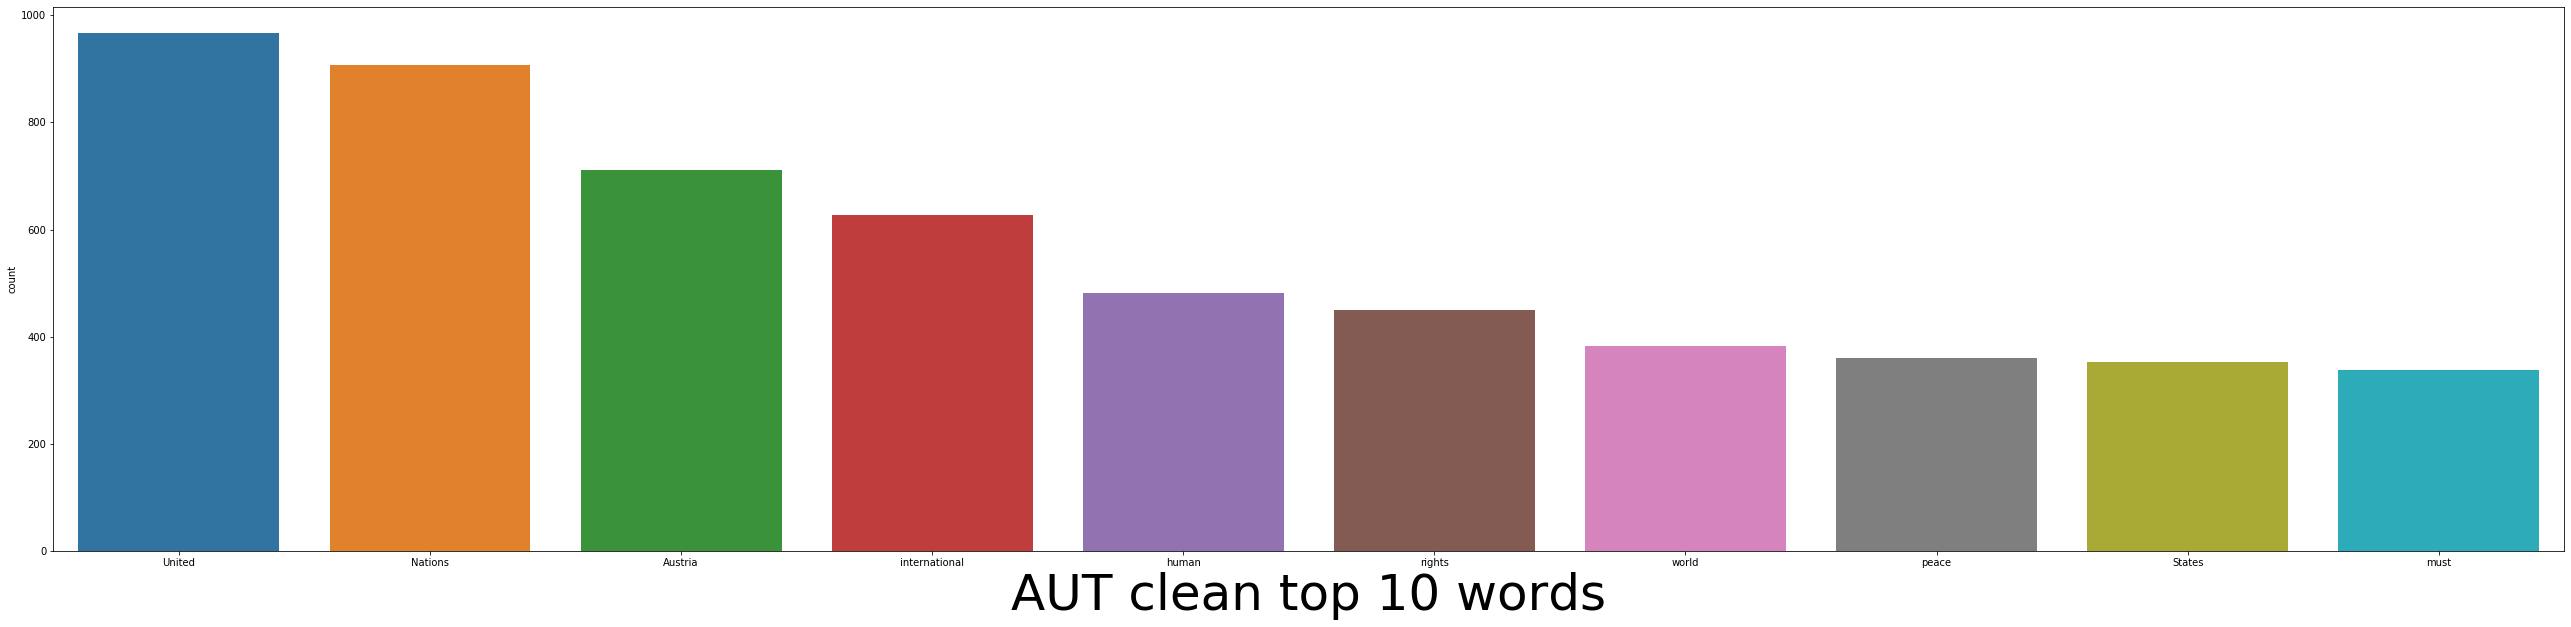

In [320]:
plt.figure(figsize=(45,10))
sns.countplot(aut_clean, order=pd.Series(aut_clean).value_counts().index[:10])
plt.xlabel('AUT clean top 10 words', fontsize=50)
plt.show()

In [321]:
sdn_clean = []
for token in sdn_tokens:
    if not token.lower() in new_list:
        sdn_clean.append(token)

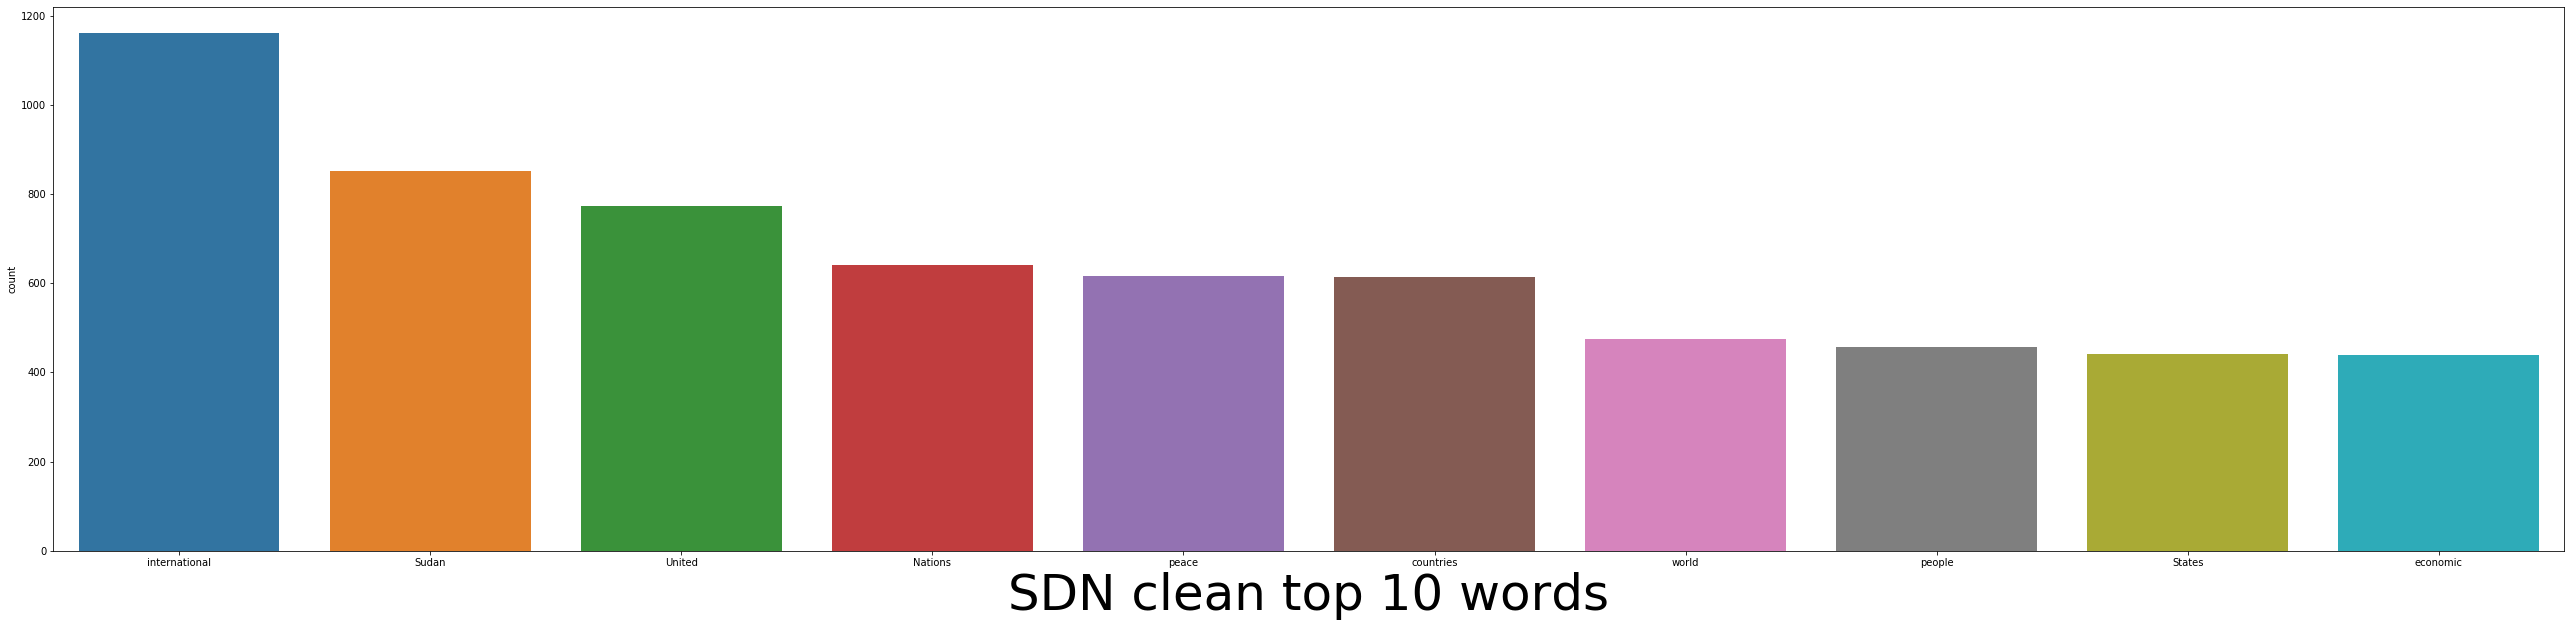

In [322]:
plt.figure(figsize=(45,10))
sns.countplot(sdn_clean, order=pd.Series(sdn_clean).value_counts().index[:10])
plt.xlabel('SDN clean top 10 words', fontsize=50)
plt.show()

In [323]:
ury_clean = []
for token in ury_tokens:
    if not token.lower() in new_list:
        ury_clean.append(token)

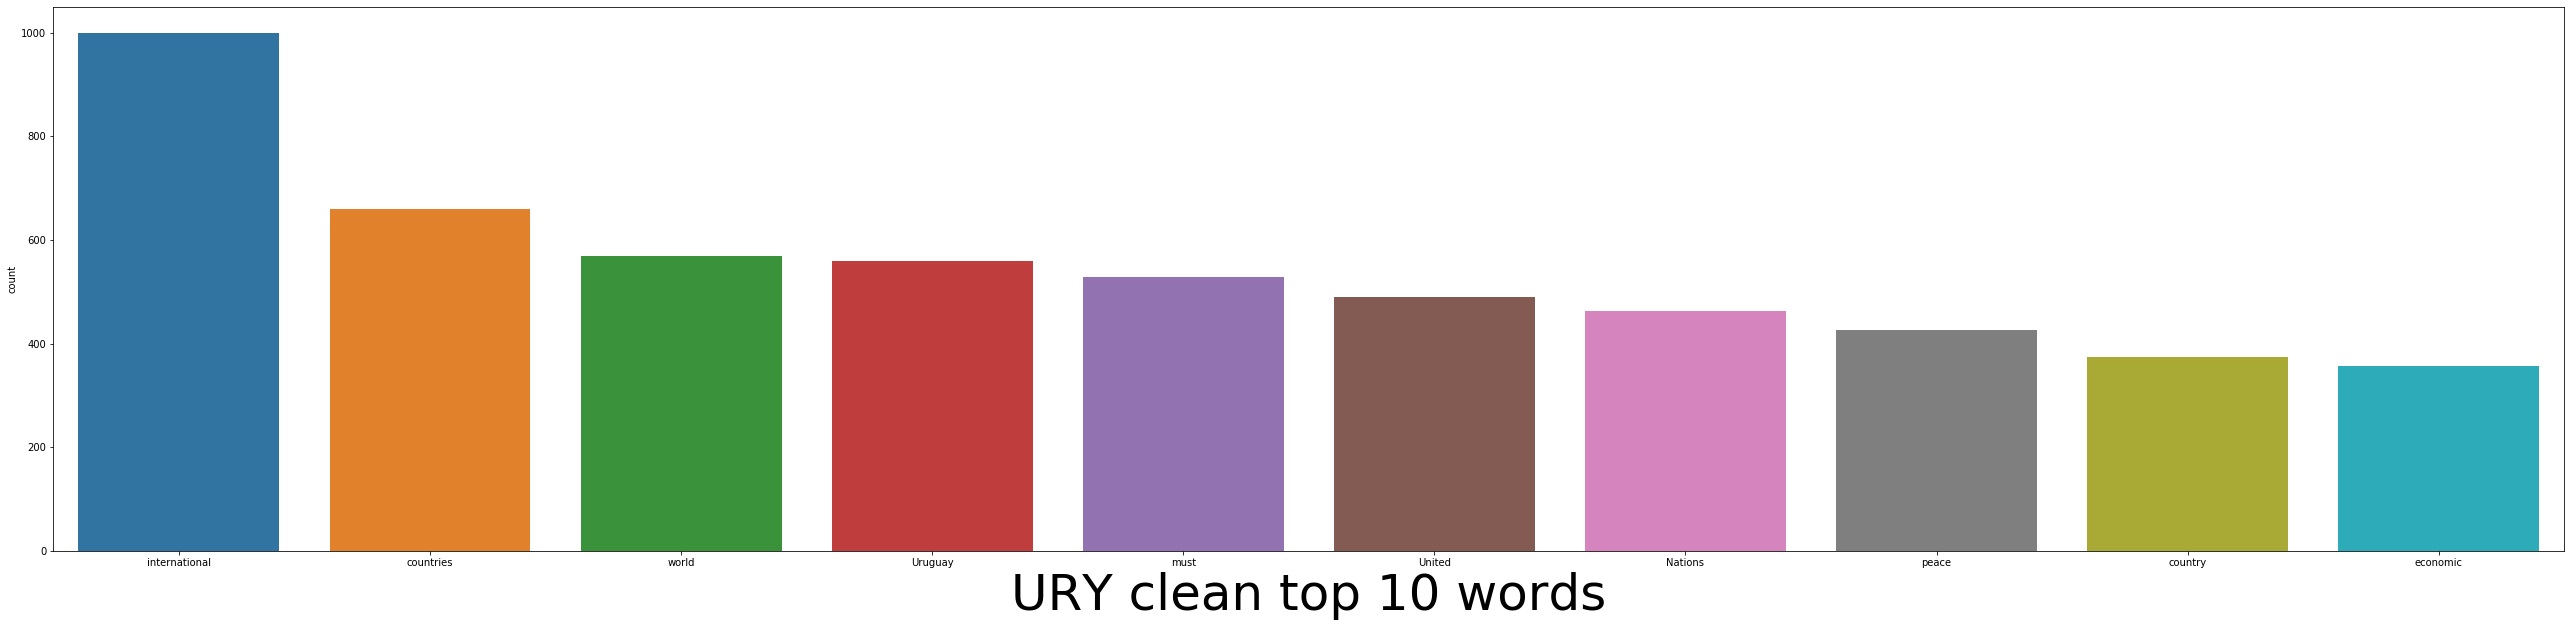

In [324]:
plt.figure(figsize=(45,10))
sns.countplot(ury_clean, order=pd.Series(ury_clean).value_counts().index[:10])
plt.xlabel('URY clean top 10 words', fontsize=50)
plt.show()

After removing certain words, the plots start to make sense. 

To compare the results with and without the words I removed: there's no commonalities but differences. The top 10 words are completely different, mainly because the words in Q3a plots are in the remove list, becasue they don't have any meaning in the text.

To compare the 3 plots in Q3b, there are some interesting findings:

1. commonalities:
It seems the 3 countries emphasize the global concept a lot by using words like 'international', 'united' and 'world'. Similarly, it can be assumed the 3 countries all interested in topics like economic development and peaceful international relationships. Lastly, they all mention their country name in the speeches quite often.
2. differences:
It's interesting that Austria and Uruguay like to use the word 'must', which might imply the speaker has a strict or tough personality, whereas Sudan didn't use such strong term, but mentioned 'people' while the other 2 countries didn't mention 'people' as much. Austria talks about rights, or human rights more often than the other 2.


### <span style="color:magenta"> Q4. [20 pts] Lemmas across sessions
1. Select three UN sessions covered by the data.
1. Obtain the lemmas and their counts for all statements for a given session and select the top 10+ lemmas (your choice for how many to consider). 
 - Remove stop words, punctuations, and any other characters or words you deem necessary during this process.
1. Of the lemmas with counts above zero across all three sessions, select five and plot them and their counts across time. Make sure your plot is labeled and has a title. 
1. Describe the patterns you can see in the plot. Does it seem to indicate any changes in topics over time? Can you relate any of these trends to world events occurring at that time?

In [325]:
from nltk.stem import 	WordNetLemmatizer

In [326]:
un_data.head()
un_data[un_data['session']==64]

,session,year,country,text,country_name
2728,64,2009,VUT,I begin by joining others \nin congratulating Mr. Ali Abdussalam Treki on \nassuming the noble and high responsibility of the \npresidency of the ...,Vanuatu
2729,64,2009,BHS,"On behalf of the \nGovernment and people of the Commonwealth of the \nBahamas, I convey my sincere congratulations on \nMr. Ali Abdussalam Treki’s...",Bahamas
2730,64,2009,SOM,I would like \nto begin by congratulating Mr. Ali Treki on his election \nas President of the General Assembly at its sixty-fourth \nsession. We a...,Somalia
2731,64,2009,LBR,"My delegation and I are \nhonoured, for the second time, to address the General \nAssembly on behalf of President Ellen Johnson Sirleaf \nand the ...",Liberia
2732,64,2009,AUT,"This has been a truly \nremarkable week, remarkable for the leadership shown \nby the Secretary-General on climate change, the new \npolicies of P...",Austria
...,...,...,...,...,...
2916,64,2009,MLT,I would like to congratulate \nMr. Ali Treki on his unanimous election to preside over \nthe General Assembly at its sixty-fourth session. His \ne...,Malta
2917,64,2009,MAR,"On behalf of the \nKingdom of Morocco, I should like to congratulate you \nwarmly, Sir, on your election to the presidency of the \nGeneral-Assemb...",Morocco
2918,64,2009,BHR,"\nWith great pleasure I extend heartfelt congratulations \nto my brother, His Excellency Mr. Ali Abdussalam \nTreki, Secretary of African Union Af...",Bahrain
2919,64,2009,PRT,"I \nwish the President all the best for this General \nAssembly. Along with Secretary-General Ban \nKi-moon, he can count on Portugal’s firm suppo...",Portugal


In [327]:
from nltk.stem import 	WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import Counter

In [328]:
session1 = un_data[un_data['session']==44].text.sum()

In [329]:
session1_token = nltk.word_tokenize(session1)
session1_list = []
for token in session1_token:
    if not token.lower() in new_list:
        session1_list.append(token)

In [330]:
lemma_function = WordNetLemmatizer()
lemma_list1 =[]
for token, tag in pos_tag(session1_list):
    lemma = lemma_function.lemmatize(token)
    lemma_list1.append(lemma)

In [331]:
counter1 = Counter(lemma_list1).most_common(10)
counter1

[('country', 3450),
 ('international', 3103),
 ('United', 2294),
 ('Nations', 2098),
 ('world', 1889),
 ('peace', 1831),
 ('people', 1750),
 ('economic', 1488),
 ('development', 1467),
 ('problem', 1433)]

In [332]:
session2 = un_data[un_data['session']==64].text.sum()

In [333]:
session2_token = nltk.word_tokenize(session2)
session2_list = []
for token in session2_token:
    if not token.lower() in new_list:
        session2_list.append(token)
lemma_function = WordNetLemmatizer()
lemma_list2 =[]
for token, tag in pos_tag(session2_list):
    lemma = lemma_function.lemmatize(token)
    lemma_list2.append(lemma)

In [334]:
counter2 = Counter(lemma_list2).most_common(10)
counter2

[('country', 2275),
 ('United', 2062),
 ('Nations', 1797),
 ('international', 1758),
 ('world', 1502),
 ('global', 1134),
 ('development', 1072),
 ('people', 1069),
 ('crisis', 1065),
 ('must', 1056)]

In [335]:
session3 = un_data[un_data['session']==70].text.sum()

In [336]:
session3_token = nltk.word_tokenize(session3)
session3_list = []
for token in session3_token:
    if not token.lower() in new_list:
        session3_list.append(token)
lemma_function = WordNetLemmatizer()
lemma_list3 =[]
for token, tag in pos_tag(session3_list):
    lemma = lemma_function.lemmatize(token)
    lemma_list3.append(lemma)

In [337]:
counter3 = Counter(lemma_list3).most_common(10)
counter3

[('United', 2538),
 ('Nations', 2277),
 ('country', 1980),
 ('international', 1566),
 ('world', 1454),
 ('people', 1401),
 ('development', 1262),
 ('peace', 1200),
 ('year', 1123),
 ('must', 1033)]

In [338]:
df1 = pd.DataFrame(counter1, columns =['lemma word', '1989'])

In [339]:
df1

,lemma word,1989
0,country,3450
1,international,3103
2,United,2294
3,Nations,2098
4,world,1889
5,peace,1831
6,people,1750
7,economic,1488
8,development,1467
9,problem,1433


In [340]:
df2 = pd.DataFrame(counter2, columns =['lemma word', '2009'])

In [341]:
df2

,lemma word,2009
0,country,2275
1,United,2062
2,Nations,1797
3,international,1758
4,world,1502
5,global,1134
6,development,1072
7,people,1069
8,crisis,1065
9,must,1056


In [342]:
df3 = pd.DataFrame(counter3, columns =['lemma word', '2015'])

In [343]:
df3

,lemma word,2015
0,United,2538
1,Nations,2277
2,country,1980
3,international,1566
4,world,1454
5,people,1401
6,development,1262
7,peace,1200
8,year,1123
9,must,1033


In [344]:
df = df1.merge(df2, on='lemma word').merge(df3, on='lemma word')
top5words=df.head().set_index("lemma word")
top5words

,1989,2009,2015
lemma word,,,
country,3450,2275,1980
international,3103,1758,1566
United,2294,2062,2538
Nations,2098,1797,2277
world,1889,1502,1454


Text(0.5, 0, '5 common lemma words changing trend across time')

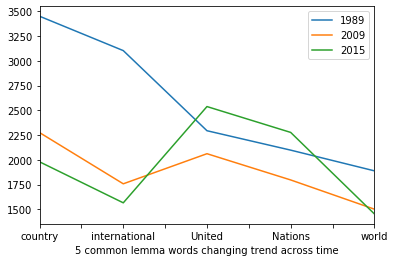

In [374]:
top5words.plot(kind='line')
plt.xlabel('5 common lemma words changing trend across time')

I randomly chose the 3 sessions: 44, 64 and 70, and they are years 1989, 2009 and 2015.

Before my interpretion, here's some background of UN:
'The United Nations is an intergovernmental organization that aims to maintain international peace and security, develop friendly relations among nations, achieve international cooperation, and be a center for harmonizing the actions of nations.'
source: https://en.wikipedia.org/wiki/United_Nations

Based on this background, it's not surprising countries use less and less 'country' and more and more 'united' & 'nations'. However, the United Nation seems just emphasize union within this group, and is less inclined to open this concept globally. The frequency of words 'international' and 'world' becoming smaller and smaller.

### <span style="color:magenta"> Bonus. [5 pts] Similarity using GloVe
GloVe is an unsupervised learning algorithm for obtaining vector representations of words that's conceptually similar to, but technically different from, Word2Vec. Use gensim to load a GloVe model, one way to do this is by importing and using gensim.downloader (https://radimrehurek.com/gensim/downloader.html). See available options for GloVe models here: https://github.com/RaRe-Technologies/gensim-data#models. Even the smallest GloVe model should suffice for our purposes.
1. Choose 5 words related to the UN and its mission (https://www.un.org/en/sections/what-we-do/).
1. What are the top-10 similar words of each? Do you find anything odd or interesting? Please explain.
1. What do the top-10 most similar words indicate about the searched word, its definition, or what it implies?
    
Make a good choice in terms of how much time you spend on a five point bonus question. It may not be worth hours of effort if it's too demanding. 😊

In [346]:
import gensim.downloader as api

In [347]:
model = api.load("glove-twitter-25")

In [348]:
# 5 words I choose related to the UN and its mission are: 
# peace, security, humanitarian, sustainable, aid.
words = ['peace', 'security', 'humanitarian', 'sustainable','aid']
similar = [[item[0] for item in model.most_similar(word)[:10]] for word in words]
df = pd.DataFrame({'Word': words, 'Similar Words': similar})

In [349]:
#model = api.load("glove-twitter-100")

In [350]:
pd.options.display.max_colwidth=150
df

,Word,Similar Words
0,peace,"[god, faith, spirit, joy, lord, grace, christ, freedom, mercy, bless]"
1,security,"[safety, banking, system, government, access, report, search, emergency, policy, network]"
2,humanitarian,"[interfaith, demands, cooperation, involvement, affairs, contribution, reconciliation, empowerment, efforts, diplomatic]"
3,sustainable,"[agile, sustainability, environment, strategic, innovative, innovation, infrastructure, resources, holistic, solutions]"
4,aid,"[funds, fund, tax, welfare, benefit, health, funding, benefits, nhs, orders]"


5 words I choose related to the UN and its mission are: peace, security, humanitarian, sustainable, aid. The top-10 similar words of each are as above. 

For word 'peace', the similar words model suggested are very... religious, like 'god', 'christ', 'mercy' and 'bless'.
For word 'security', similar words including 'banking', 'government', 'policy', I assume those words are what the model believes to bring security, whereas 'access', 'network' might be what the model believes to have security issues. 
For word 'humanitarian', the similar words are not surprising, it's about 'interfaith', 'cooperation', 'reconciliation', 'efforts' and so on.
For word 'sustainable', the similar words are reasonable as well like 'environment', 'innovative', 'resources' and 'holistic'.
For word 'aid', the related words are 'funds', 'welfare', 'health', 'nhs'(The National Health Service is the publicly funded healthcare system of the United Kingdom) and etc.

I think the results show that when people talk about peace, they tend to use phrase like 'god bless us', and put the hope to religion. When talking about security, as I mentioned above, people could either think about things that gives them sense of security, or things that tends to have security issues. For humanitarian, it's more about team work, no judgement and open to different voices. Sustainable is a word always linking with environment, and there are popular phrases like innovative sustainable methods, sustainability of resources or sustainable infrastructure. Lastly, aid is a word linked with funds/donation, health improvement or tax reduction, and nhs is one of the biggest health care system.